<a href="https://colab.research.google.com/github/jhguay/base_ouverte/blob/main/IRISDATA_Simplifiee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importation des premières bibliothèques


In [66]:

import scipy # bibliothèque de calcul scientifique 
import matplotlib # bibliothèque d'affichage graphique
import sklearn # bibliothèque d'algorithmes "classiques" d'apprentissage automatique 
from numpy import * # bibliothèque de calcul matriciel
from pandas import * # bibliothèque de manipulation de tableaux de données
from sklearn import * # bibliothèque d'algorithmes "classiques" d'apprentissage automatique
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from pandas import DataFrame, read_csv
%matplotlib inline
import IPython
import sys 

In [67]:
def afficher_matrice_confusion(cm, noms_etiquettes = [u'classe - 0', u'classe - 1', u'classe - 3'],
                   titre=u'Matrice de confusion'):
#     plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    print("\n",cm,"\n")
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title(titre)
    plt.colorbar()
    tick_marks = np.arange(len(noms_etiquettes))
    plt.xticks(tick_marks, noms_etiquettes, rotation=60)
    plt.yticks(tick_marks, noms_etiquettes)
    plt.ylabel(u'Vraie étiquette')
    plt.xlabel(u'Étiquette prédite')
    # Fonction d'ajustement
    plt.tight_layout()
    plt.show()

### Vérification de l'installation

In [68]:
import os
GERME_ALEATOIRE = 21
os.environ['PYTHONHASHSEED'] = str(GERME_ALEATOIRE)
import random
random.seed(GERME_ALEATOIRE)
import numpy as np
np.random.seed(GERME_ALEATOIRE)

### Lecture des données - fonction Pandas `read_csv()`

In [69]:
# Création d'une liste de noms d'attributs en français
noms_attributs = ["longueur_sépales","largeur_sépales","longueur_pétales","largeur_pétales", "espèce"]
donnees_iris_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=noms_attributs)


In [70]:
#Visualisation des données
donnees_iris_df.head()

,longueur_sépales,largeur_sépales,longueur_pétales,largeur_pétales,espèce
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Format du tableau de données - l'attribut DataFrame `.shape` 

In [71]:
donnees_iris_df.shape

(150, 5)

In [72]:
donnees_iris_df.columns

Index(['longueur_sépales', 'largeur_sépales', 'longueur_pétales',
       'largeur_pétales', 'espèce'],
      dtype='object')

In [73]:
donnees_iris_df.describe()

,longueur_sépales,largeur_sépales,longueur_pétales,largeur_pétales
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Classification

### Chargement des bibliothèques de scikit-learn ou `sklearn`

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print("Bibliothèques Sklearn importées")

Bibliothèques Sklearn importées


In [75]:
cibles_df = donnees_iris_df['espèce']

In [76]:
cibles_df.shape

(150,)

In [100]:
predicteurs_df = donnees_iris_df.drop(['espèce'],axis='columns')

In [101]:
predicteurs_df.shape

(150, 4)

In [102]:
# On calcule la moyenne `mean()` des cas où la classe-cible correspond à une valeur donnée
print("Iris-setosa:{pourcent: .2f} %".format(pourcent=np.mean(cibles_df == "Iris-setosa")*100))
print("Iris-versicolor:{pourcent: .2f} %".format(pourcent=np.mean(cibles_df == "Iris-versicolor")*100))
print("Iris-virginica:{pourcent: .2f} %".format(pourcent=np.mean(cibles_df == "Iris-virginica")*100))

Iris-setosa: 33.33 %
Iris-versicolor: 33.33 %
Iris-virginica: 33.33 %


In [103]:
cibles_df

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: espèce, Length: 150, dtype: object

### Préparation des données pour Scikit-Learn

Scikit-Learn exige que les attributs prennent des valeurs numériques avec décimales. Il faut donc convertir les valeurs catégorielles en valeurs numériques. Il faut également qu'il n'y ait pas de valeur manquante dans les données.   

Aussi, Scikit-Learn s'attend que les attributs se trouvent dans un tableau où chaque colonne est un attribut et chaque ligne un exemplaire de données (observation ou point de données).

#### Encodage des attributs catégoriels - fonction Sklearn `LabelEncoder()`

Rappelons qu'un attribut catégoriel prend des valeurs d'étiquettes symboliques. Par exemple, l'attribut "couleur" peut prendre les valeurs "rouge", "vert" et "bleu". Les algorithmes d'apprentissage automatique dont les réseaux de neurones profonds exigent que les variables d'entrée soient des nombres. Il faut donc encoder les données catégorielles en nombres avant de les utiliser pour entraîner un modèle.

In [104]:
#Transformation des données de la cible en données numériques
from sklearn.preprocessing import LabelEncoder
encodeur = LabelEncoder()
encodeur.fit(cibles_df.values)
cibles = encodeur.transform(cibles_df)
# Afficher les dix premières cibles
cibles [:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:

#conversion des données en nombre décimales
predicteurs = predicteurs_df.values
print(predicteurs)

### Division en données d'entraînement et de test - fonction Sklearn `train_test_split()`

Nous allons retenir une partie des données dans un jeu de données de test que l'algorithme ne verra pas et nous utiliserons ces données pour avoir une idée des performances du modèle sur des données inconnues.

Nous diviserons l'ensemble de données en deux, dont typiquement 80 % serviront à l'entraînement, à l'évaluation et à la sélection parmi nos modèles, et 20 % seront retenues comme ensemble de données de test.

<ul>
    <li>Dans un premier temps, nous allons partager les données entre un ensemble de données d'entraînement et un ensemble de données de test. Les données de test seront isolées et conservées pour évaluer la performance finale des algorithmes sur des données fraîches. C'est ce qu'on appelle la mesure de l'erreur de généralisation.</li>
</ul>

Note technique: Le paramètre de stratification `stratify` s'assure que la répartition aléatoire des données de `train_test_split()` respecte la proportion de valeurs dans l'échantillon fourni à `stratify`. Ceci est particulièrement important pour les petits jeux de données où la répartition aléatoire des données peut retourner des résultats très différents d'une fois à l'autre.

Par exemple, si la classe-cible `cibles_df` est un attribut catégoriel avec 3 valeurs réparties également comme dans l'exemple des données sur les Iris, l'affectaion `stratify=cibles_df` assurera que la répartition aléatoire respecte ce ratio. Évidemment s'il n'y a pas de répartition aléatoire et que le paramètre `shuffle=False`, alors `stratify=None`.

In [88]:
#Division des données: entraintement et test
from sklearn.model_selection import train_test_split
test_ratio = 0.30
predicteurs_ent, predicteurs_test, cibles_ent, cibles_test = train_test_split(predicteurs,
                                                                              cibles,
                                                                              test_size=test_ratio,
                                                                              stratify=cibles_df,
                                                                              random_state=42)

In [89]:
print("Dimensions de predicteurs entrainement:",predicteurs_ent.shape)
print("Dimensions de predicteurs test:",predicteurs_test.shape)
print("Dimensions de cibles entrainement:",cibles_ent.shape)
print("Dimensions de cibles test:",cibles_test.shape)

Dimensions de predicteurs entrainement: (105, 4)
Dimensions de predicteurs test: (45, 4)
Dimensions de cibles entrainement: (105,)
Dimensions de cibles test: (45,)


In [90]:
cibles_ent, cibles_test

(array([1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2,
        2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0,
        2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2,
        2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2,
        2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0]),
 array([2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
        1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2,
        1]))

### Choix de différents algorithmes de classification

#### Arbres à gradient dopé - XGBoost

Les arbres à gradient dopé (gradient boosting trees) se basent sur un méta-algorithme d'apprentissage ensembliste qui agrège itérativement des classificateurs faibles créés et pondérés selon leur performance pour former un classificateur final fort (capacité plus élevée, biais réduit), en l'occurrence ici des arbres de décisions. 

Par itérations successives, des classificateurs faibles (faible capacité, biais élevé), sous la forme de petits arbres de décision, sont ajoutés un à un à un ensemble d'arbres en utilisant une fonction de coût optimisée par descente de gradient.

Au moment de l'ajout d'un classificateur faible, la pondération des exemples de données (ou points de données) est réajustée (re-pondération) où les exemples mal classés gagnent du poids et les exemples bien classées perdent du poids. Ainsi, un nouveau classificateur faible se concentrera davantage sur les exemples mal classés par les classificateurs faibles précédents pour corriger leur influence. Rappelons qu'un classificateur faible est un classificateur capable de distinguer deux classes au moins aussi bien que le hasard ne le permet (il ne se trompe donc pas plus d'une fois sur deux en moyenne, si la distribution des classes est équilibrée). Des algorithmes très populaires appliquent le dopage de gradient comme l'incontournable XGBoost et AdaBoost (abréviation du terme adaptative boosting) qui a maintenant surtout une importance historique.

Note: Pour plus de généralité, on pourrait remplacer le mot «classificateur» par «modèle»

XGBoost en est un très bon exemple, XGBoost pour Extreme Gradient Boosting.

### Outils d'évaluation d'un modèle

### Évaluation finale du modèle avec les données de test

Nous avons retenu une partie des données dans le jeu de données de test que l'algorithme n'a pas touchées. Nous utiliserons ces données pour avoir une idée des performances du modèle sur des données inconnues.

In [91]:
# Inspiration: https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


>  arbres_dopage_gradient: 0.961905 (0.035635)
>  arbres_dopage_gradient: - Erreur de classification sur les données test: 3
>  arbres_dopage_gradient- Exactitude: 0.93
Matrice de confusion:


 [[15  0  0]
 [ 0 14  1]
 [ 0  2 13]] 



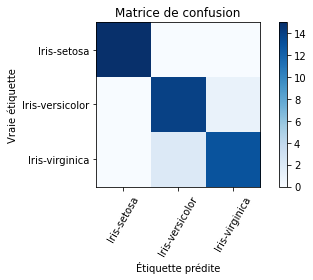


Rapport de classification:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

------------------------------------------------------------------------------------------ 



In [92]:
arbres_dopage_gradient = xgb.XGBClassifier(use_label_encoder=False,eval_metric='mlogloss')
modele=arbres_dopage_gradient
validation_croisee = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
nom_modele="arbres_dopage_gradient"
modele = xgb.XGBClassifier(use_label_encoder=False,eval_metric='mlogloss')
resultat_vc = cross_val_score(arbres_dopage_gradient,predicteurs_ent,cibles_ent,cv=validation_croisee,scoring='accuracy')
print('>  %s: %f (%f)' % ("arbres_dopage_gradient", resultat_vc.mean(), resultat_vc.std()))
modele.fit(predicteurs_ent, cibles_ent)
test_predictions = modele.predict(predicteurs_test)
print('>  %s: - Erreur de classification sur les données test: %d' % 
(nom_modele, (cibles_test != test_predictions).sum()))
print('>  %s- Exactitude: %.2f' % 
(nom_modele, accuracy_score(cibles_test, test_predictions)))
# Affichage d'une matrice de confusion et d'un rapport de classification
print("Matrice de confusion:\n")
afficher_matrice_confusion(confusion_matrix(cibles_test, test_predictions),['Iris-setosa','Iris-versicolor', 'Iris-virginica'])
print("\nRapport de classification:\n",classification_report(cibles_test, test_predictions))
print("-"*90,"\n")
